In [191]:

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

from online_algos import OLMAR

import pandas as pd
import matplotlib.pyplot as plt


PLOT_DATES_TEST_START = '2021-04-06'
PLOT_DATES_TEST_END = '2022-03-31'

ensemble_results_file = 'result.csv'

# PLOT_DATES_TEST_START = '2022-01-03'
# PLOT_DATES_TEST_END = '2022-12-30'

# ensemble_results_file = 'result2022.csv'


value_to_remove = "DOW"
# # Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]


# test = [
# "AXP",
#     "AMGN",
#     "AAPL",
#     "BA",
#     "CAT"]


df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


print(df.head())

# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for no-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (7250, 8)
         date        open        high         low       close    volume   tic  \
0  2021-04-06  126.500000  127.129997  125.650002  123.735481  80171300  AAPL   
1  2021-04-06  251.740005  252.539993  248.240005  223.145020   2040100  AMGN   
2  2021-04-06  145.979996  146.529999  144.380005  139.780563   2851200   AXP   
3  2021-04-06  257.209991  259.350006  254.660004  255.169998  11180300    BA   
4  2021-04-06  232.500000  236.679993  230.229996  214.790848   2614500   CAT   

   day  
0    1  
1    1  
2    1  
3    1  
4    1  
Number of rows containing null values: 0
Check for no-nulls
True


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
            date        open        high         low       close    volume  \
0     2021-04-06  126.500000  127.129997  125.650002  123.735481  80171300   
1     2021-04-06  251.740005  252.539993  248.240005  223.145020   2040100   
2     2021-04-06  145.979996  146.529999  144.380005  139.780563   2851200   
3     2021-04-06  257.209991  259.350006  254.660004  255.169998  11180300   
4     2021-04-06  232.500000  236.679993  230.229996  214.790848   2614500   
...          ...         ...         ...         ...         ...       ...   
7245  2022-03-30  515.109985  521.200012  512.479980  502.192535   3041200   
7246  2022-03-30  225.839996  226.160004  222.729996  219.617508   7084000   
7247  2022-03-30   51.220001   51.630001   51.080002   43.250614  23821200   
7248  2022-03-30   47.820000   48.480000   47.290001   40.7121

<Axes: xlabel='date'>

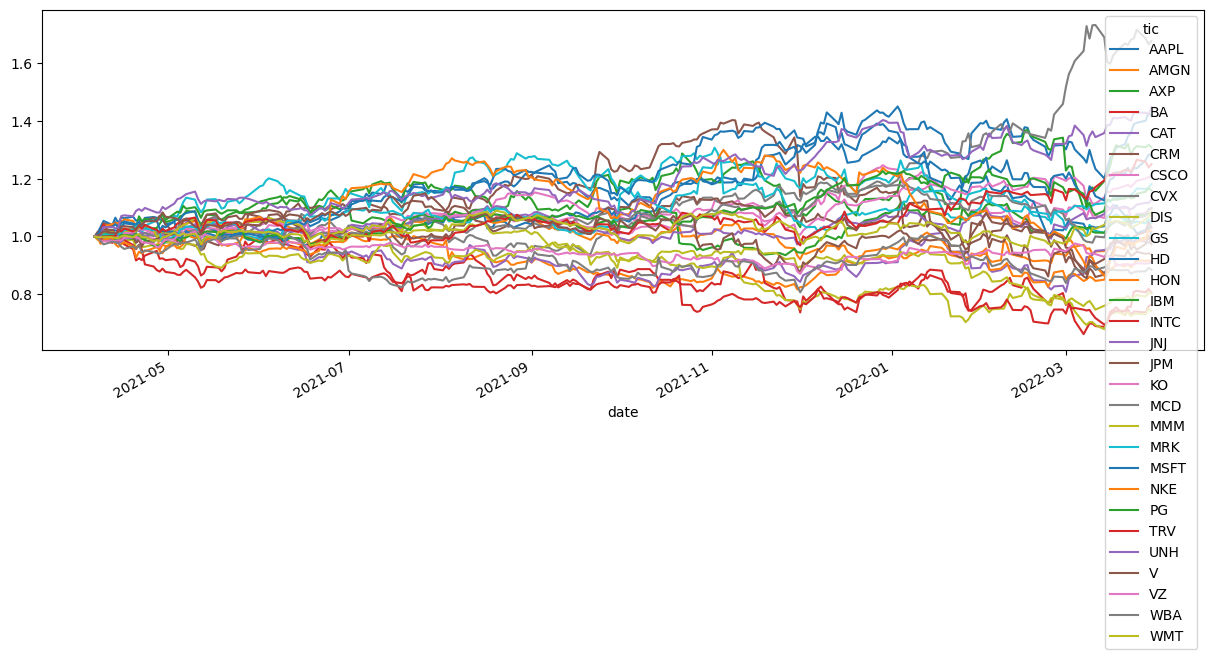

In [192]:
df = pd.DataFrame(df)

print(df.dtypes)
print(df)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)

(pivot_df / pivot_df.iloc[0,:]).plot()


Final Portfolio:
Shares: AAPL      68.0
AMGN       0.0
AXP      161.0
BA       305.0
CAT       32.0
CRM       44.0
CSCO       0.0
CVX     1133.0
DIS      249.0
GS         0.0
HD         0.0
HON      127.0
IBM      274.0
INTC     654.0
JNJ        0.0
JPM        0.0
KO       628.0
MCD       84.0
MMM       38.0
MRK        0.0
MSFT      34.0
NKE      318.0
PG      2922.0
TRV       37.0
UNH        4.0
V        211.0
VZ       636.0
WBA     1138.0
WMT        0.0
dtype: float64
Total of each: AAPL     11921.789551
AMGN              0.0
AXP      29442.666183
BA       59447.551117
CAT       6783.729492
CRM       9415.561584
CSCO              0.0
CVX     170409.952774
DIS      34824.361267
GS                0.0
HD                0.0
HON      23671.113281
IBM      32349.411392
INTC     31433.171883
JNJ               0.0
JPM               0.0
KO       36240.595367
MCD      19760.770569
MMM       4269.924423
MRK               0.0
MSFT       10443.8479
NKE      42618.443848
PG      423610.770355
TRV

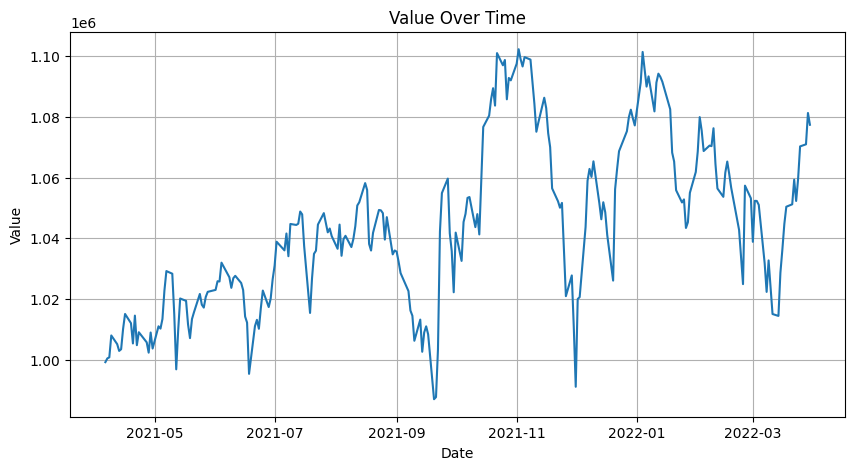

In [233]:
import numpy as np
import pandas as pd

transaction_fees=[]

def calculate_sma(prices, window):
    return prices.rolling(window=window).mean()

def rebalance_portfolio_olmar(cash, shares, prices, window=10, eps=10):
    # Calculate Moving Averages
    sma = calculate_sma(prices, window)
    
    # Calculate price deviation
    deviation = prices.iloc[-1] / sma.iloc[-1] - 1
    
    # Update target weights based on OLMAR algorithm
    excess_return = eps - deviation.mean()
    weights = np.maximum(0, deviation * excess_return)
    weights = weights / weights.sum()  # Normalize the weights

    if(weights.isnull().values.any()):
        # Default to uniform weights if no weights are calculated yet
        weights = (np.ones(len(prices.iloc[-1]))) / (len(prices.iloc[-1]))

    remaining_cash = cash
    
    # Available amount for purchases of each stock, must factor in the transaction cost
    current_wealth = (np.sum(prices.iloc[-1] * shares) + cash) / (1 + transaction_cost)

    target_values = weights * current_wealth
    target_shares = target_values // (prices.iloc[-1])
    
    shares_to_change = target_shares - shares

    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)
    sale_amount = (np.sum(sell_shares * prices.iloc[-1]) + np.sum(buy_shares * prices.iloc[-1]))
    transaction_fee = (np.sum(sell_shares * prices.iloc[-1]) + np.sum(buy_shares * prices.iloc[-1])) * transaction_cost

    # Test a shrinkage factor
    pending_transaction = cash + np.sum(sell_shares * prices.iloc[-1]) - np.sum(buy_shares * prices.iloc[-1]) - transaction_fee

    # We are about to go negative on cash, need to use the shrink factor
    if (pending_transaction < 0):
        shrink_factor = (np.sum(prices.iloc[-1] * shares) + cash) / ((1 + transaction_cost) * sale_amount )
        shares_to_change = np.floor(shares_to_change * shrink_factor)

    # Readjusted to the shrink factor if needed
    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)
    sale_amount = (np.sum(sell_shares * prices.iloc[-1]) + np.sum(buy_shares * prices.iloc[-1]))
    transaction_fee = (np.sum(sell_shares * prices.iloc[-1]) + np.sum(buy_shares * prices.iloc[-1])) * transaction_cost
    
    cash += np.sum(sell_shares * prices.iloc[-1])
    cash -= np.sum(buy_shares * prices.iloc[-1])

    shares = shares + shares_to_change
    remaining_cash = cash - transaction_fee

    transaction_fees.append(transaction_fee)

    assert remaining_cash >= 0, "Cash went negative"
    
    return shares, remaining_cash, weights


transaction_cost = 0.001

new_column_names = ['Date'] + [f'{col}' for col in pivot_df.columns]

# Convert to the desired format
X = pivot_df.reset_index()
X.columns = new_column_names

# Initialize to uniform shares
initial_cash = 1000000
initial_shares = np.ones(len(X.columns) - 1) / (len(X.columns) - 1)
net_worth = []

portfolio_shares = initial_shares
portfolio_cash = initial_cash

rebalance_iter = 50
rebalance_i = rebalance_iter

# Rebalance at each step
for idx, row in X.iterrows():
    price_per_share = row[1:].values
    
    # Reset the index as needed
    if (rebalance_i % rebalance_iter == 0):
        portfolio_shares, portfolio_cash, target_weights = rebalance_portfolio_olmar(
        portfolio_cash, 
        portfolio_shares, 
        X.set_index('Date').iloc[:idx+1], 
        window=5, 
        eps=10)

        rebalance_i = 0
    rebalance_i += 1
    
    asset_wealth = np.sum(portfolio_shares * price_per_share)
    net_worth.append(asset_wealth + portfolio_cash)

print("\nFinal Portfolio:")
print(f"Shares: {portfolio_shares}")
print(f"Total of each: {portfolio_shares * price_per_share}")
print(f"Cash: {portfolio_cash:.2f}")
print(f"Transaction fees: {np.sum(np.array(transaction_fees))}")
print(f"Final Net Worth: {net_worth[-1]}")


# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(X['Date'], net_worth)
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()



                0
0    9.991599e+05
1    1.000393e+06
2    1.000745e+06
3    1.007963e+06
4    1.005100e+06
..            ...
245  1.059649e+06
246  1.070297e+06
247  1.070988e+06
248  1.081315e+06
249  1.077428e+06

[250 rows x 1 columns]
          Date  OLMAR Net Worth
0   2021-04-06     9.991599e+05
1   2021-04-07     1.000393e+06
2   2021-04-08     1.000745e+06
3   2021-04-09     1.007963e+06
4   2021-04-12     1.005100e+06
..         ...              ...
245 2022-03-24     1.059649e+06
246 2022-03-25     1.070297e+06
247 2022-03-28     1.070988e+06
248 2022-03-29     1.081315e+06
249 2022-03-30     1.077428e+06

[250 rows x 2 columns]
                ensemble           dji
date                                  
2021-04-06  1.000000e+06  1.000000e+06
2021-04-07  9.998617e+05  1.000479e+06
2021-04-08  1.000011e+06  1.002194e+06
2021-04-09  1.001304e+06  1.011079e+06
2021-04-12  1.000007e+06  1.009427e+06
...                  ...           ...
2022-03-28  1.026980e+06  1.045637e+06
2

<Figure size 1500x500 with 0 Axes>

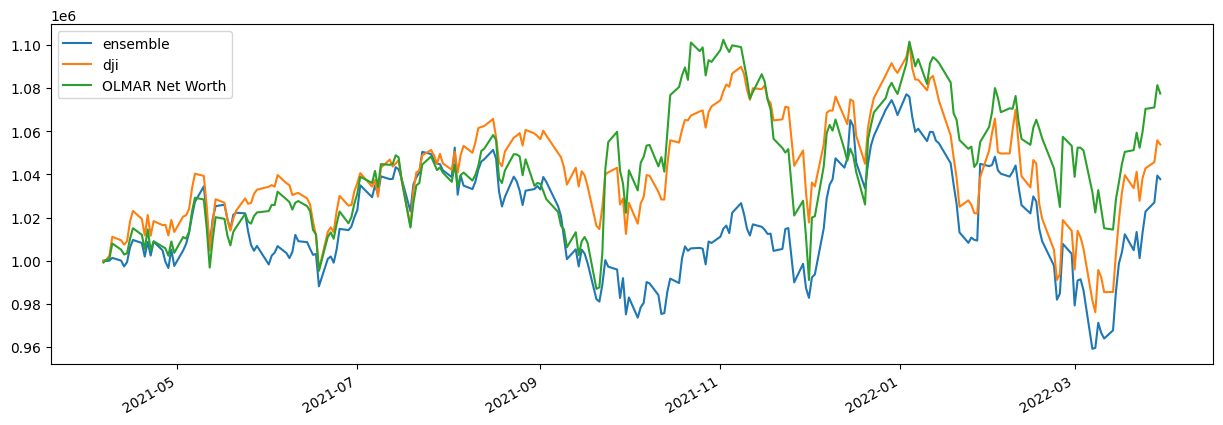

In [234]:
result = pd.DataFrame()

df = pd.DataFrame(net_worth)

print(df)

# Combine the DataFrames side-by-side
combined_df = pd.concat([X.Date, df], axis=1)

combined_df.columns = ["Date", "OLMAR Net Worth"]
print(combined_df)

combined_df.set_index('Date', inplace=True)

# TODO Change result period to use saved file
result = pd.read_csv(ensemble_results_file)

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

print(result)

# Join DataFrames on date index
merged_df = result.join(combined_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

[*********************100%***********************]  1 of 1 completed

==============Get Baseline Stats===========
Shape of DataFrame:  (249, 8)
Annual return          0.056447
Cumulative returns     0.055757
Annual volatility      0.133905
Sharpe ratio           0.478513
Calmar ratio           0.498493
Stability              0.066912
Max drawdown          -0.113235
Omega ratio            1.082110
Sortino ratio          0.677200
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.987294
Daily value at risk   -0.016616
dtype: float64
df_dji:            date           dji
0   2021-04-06  1.000000e+06
1   2021-04-07  1.000479e+06
2   2021-04-08  1.002194e+06
3   2021-04-09  1.011079e+06
4   2021-04-12  1.009427e+06
..         ...           ...
245 2022-03-24  1.038220e+06
246 2022-03-25  1.042806e+06
247 2022-03-28  1.045637e+06
248 2022-03-29  1.055757e+06
249 2022-03-30           NaN

[250 rows x 2 columns]
df_dji:                       dji
date                    
2021-04-06  1.000000e+06
2021-04-07  1.000479e+06
2021-

<Figure size 1500x500 with 0 Axes>

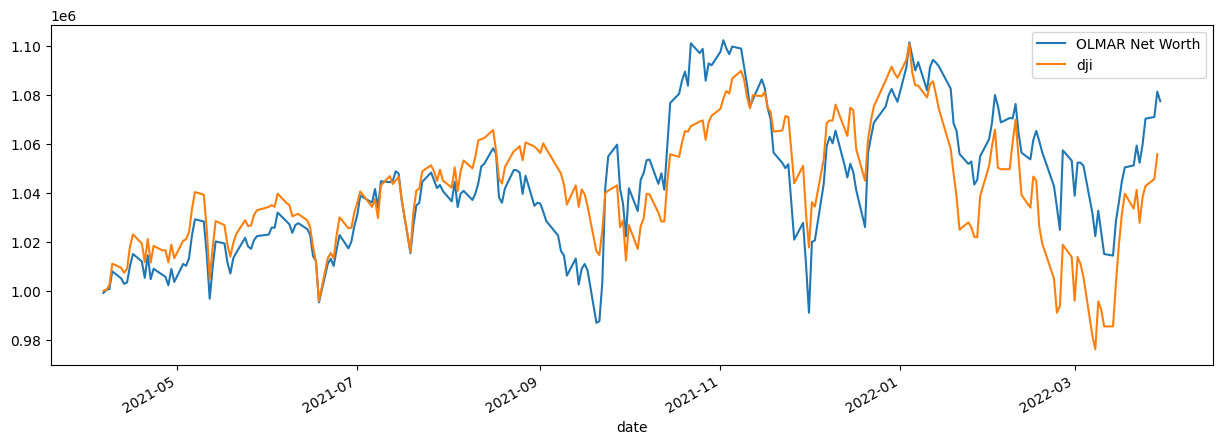

In [235]:
from finrl.plot import backtest_stats,  get_baseline

first_date = combined_df.index.min()
last_date = combined_df.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = combined_df.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_cash
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


combined_df = pd.DataFrame({'date': combined_df.index, 'OLMAR Net Worth': combined_df['OLMAR Net Worth']})
combined_df = combined_df.set_index('date')

print("df_result_bah.columns: ", combined_df.columns)

print("df_result_bah: ", combined_df)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(combined_df, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();